In [1]:
import pandas as pd

In [2]:
# reading the scrapped data
hot = pd.read_csv('hot.csv')
new = pd.read_csv('new.csv')
controverial = pd.read_csv('controversial.csv')
rising = pd.read_csv('rising.csv')
top = pd.read_csv('top.csv')
ama =  pd.read_csv('ama.csv')
caa =  pd.read_csv('caa.csv')
mega = pd.read_csv('mega.csv')
policy = pd.read_csv('policy.csv')
photo = pd.read_csv('photo.csv')
ettiquete = pd.read_csv('ettiqutte.csv')
mod = pd.read_csv('moderator.csv')
oc = pd.read_csv('OC.csv')

In [3]:
hot.head()

,title,score,id,subreddit,url,num_comments,body,link_flair_text,stickied,upvote_ratio,comments,distinguished,edited,over_18,locked,is_original_content,is_self
0,Coronavirus (COVID-19) Megathread - News and U...,277,fqqdsg,india,https://www.reddit.com/r/india/comments/fqqdsg...,6703,**Central thread for sharing coronavirus News ...,Coronavirus,True,0.96,['####I am looking for volunteers who are will...,NaN,1586192288,False,False,False,True
1,Mom came up with this impressive idea to celeb...,2214,fvz69t,india,https://i.redd.it/gurfdfd1e7r41.jpg,160,NaN,Non-Political,False,0.96,"['Happy birthday!', ""I'd eat that when not in ...",NaN,FALSE,False,False,False,False
2,Symbiotic Relationship,428,fw163b,india,https://i.redd.it/l6ad1563z7r41.jpg,18,NaN,Non-Political,False,0.92,"['NaZee News.', ""Unpopular opinion, but media ...",NaN,FALSE,False,False,False,False
3,Kerala Develops India's First Walk-In Kiosk Fo...,249,fw1uyw,india,https://www.youtube.com/watch?v=7myfBssITh4,24,NaN,Coronavirus,False,0.97,['Amazing.\n\nThey are even sanitizing the glo...,NaN,FALSE,False,False,False,False
4,Salute to the Bravehearts. Our nation is forev...,165,fw3xtl,india,https://i.redd.it/6tclev87p8r41.jpg,17,NaN,Non-Political,False,0.92,['For those who have no idea what this post is...,NaN,FALSE,False,False,False,False


In [4]:
print(len(hot.id))
hot = hot.append(new)
print(len(hot.id))
hot = hot.append(controverial)
print(len(hot.id))
hot = hot.append(rising)
print(len(hot.id))
hot = hot.append(top)
print(len(hot.id))
hot = hot.append(ama)
print(len(hot.id))
hot = hot.append(caa)
print(len(hot.id))
hot = hot.append(mega)
print(len(hot.id))
hot = hot.append(policy)
print(len(hot.id))
hot = hot.append(photo)
print(len(hot.id))
hot = hot.append(oc)
print(len(hot.id))
hot.reset_index(drop=True, inplace=True)

663
1530
2522
2547
3536
3593
3837
3917
4016
4046
4290


#### We drop the duplicate rows and rows with NaN values. Also, we make changes in the target features so that no extra cases are formed which make new classes.

In [5]:
# Removing the duplicate rows, Nan rows and rows with informal flairs
data = hot.drop_duplicates(subset='id',keep='last')
data = data[data['link_flair_text'].notna()]

data.link_flair_text = data.link_flair_text.replace('Science', 'Science/Technology')
data.link_flair_text = data.link_flair_text.replace('Politics [Megathread]', 'Politics')
data.link_flair_text = data.link_flair_text.replace('Policy', 'Policy/Economy')
data.link_flair_text = data.link_flair_text.replace('Politics [OLD]', 'Politics')
data.link_flair_text = data.link_flair_text.replace('Technology', 'Science/Technology')
data.link_flair_text = data.link_flair_text.replace('Politics -- Source in comments', 'Politics')
data.link_flair_text = data.link_flair_text.replace('Policy/Economy -2017 Article ', 'Policy/Economy')

data = data[data.link_flair_text.isin(['AskIndia','Non-Political','Scheduled','Photography','Science/Technology',
                                         'Politics','Business/Finance','Policy/Economy','Sports','Food'])]
len(data.id)

2650

In [6]:
data.reset_index(drop=True, inplace=True)

In [6]:
data.head()

,title,score,id,subreddit,url,num_comments,body,link_flair_text,stickied,upvote_ratio,comments,distinguished,edited,over_18,locked,is_original_content,is_self
663,Arunachal Man Kidnapped By Chinese Army Yet To...,1.0,fw8131,india,https://www.ndtv.com/india-news/arunachal-man-...,0.0,NaN,Non-Political,False,1.00,[],NaN,False,False,False,False,False
666,Anyone planning to get back to the gym after t...,1.0,fw7qcm,india,https://www.reddit.com/r/india/comments/fw7qcm...,1.0,"So, I've lost a ton of muscle thanks to my eye...",AskIndia,False,1.00,['Stay at home! YouTube has thousands of home ...,NaN,False,False,False,False,True
671,Has anyone insulted you with Bollywood film na...,0.0,fw6nne,india,https://www.reddit.com/r/india/comments/fw6nne...,0.0,I went to one group on Hello Talk and the pric...,AskIndia,False,0.20,[],NaN,False,False,False,False,True
672,If this ain't true.,4.0,fw6g3q,india,https://i.redd.it/7ux3vl31d9r41.jpg,1.0,NaN,Politics,False,0.64,['Remove “Indian” and it would still be accura...,NaN,False,False,False,False,False
676,Feeling inadequate,3.0,fw6505,india,https://www.reddit.com/r/india/comments/fw6505...,1.0,"Being quarantined isn't really tricky for me,I...",AskIndia,False,0.80,"['Yes, stay at home. Put out water for birds a...",NaN,1586205064.0,False,False,False,True


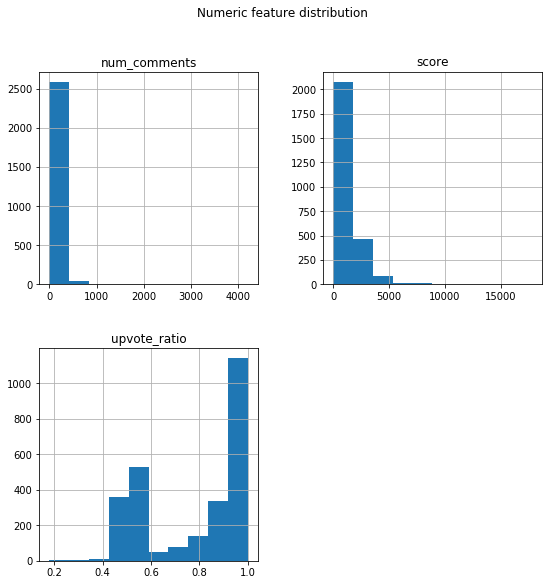

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
numeric_features = data[['num_comments','score','upvote_ratio']]
numeric_features.hist(figsize=[9,9])
plt.suptitle("Numeric feature distribution")
plt.show()

In [9]:
categorical_features = data[['stickied','edited','locked','over_18','is_original_content','is_self',
                           'distinguished']]
categorical_features.reset_index(drop=True, inplace=True)
target_feature = data[['link_flair_text']]

We analyze the target variable column for checking iregularities.
We find that there are some cases where the the flair has the same meaning but different spellings. So, we change the the same so that classes have more instances for better analysis and insights.

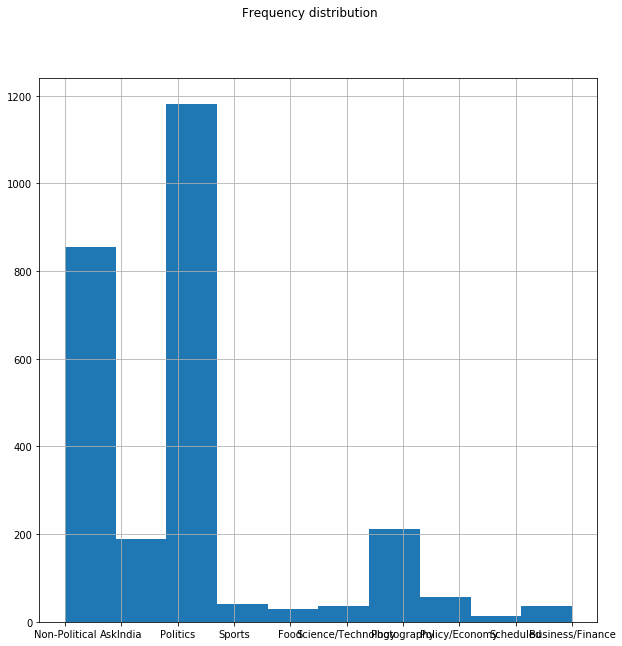

In [10]:
target_feature.link_flair_text.hist(figsize=[10,10])
plt.suptitle("Frequency distribution")
plt.show()

In [10]:
pd.unique(data.link_flair_text)

array(['Non-Political', 'AskIndia', 'Politics', 'Sports', 'Food',
       'Science/Technology', 'Photography', 'Policy/Economy', 'Scheduled',
       'Business/Finance'], dtype=object)

In [12]:
data.link_flair_text.value_counts(dropna=False)

Politics              1181
Non-Political          854
Photography            212
AskIndia               189
Policy/Economy          57
Sports                  41
Science/Technology      37
Business/Finance        35
Food                    30
Scheduled               14
Name: link_flair_text, dtype: int64

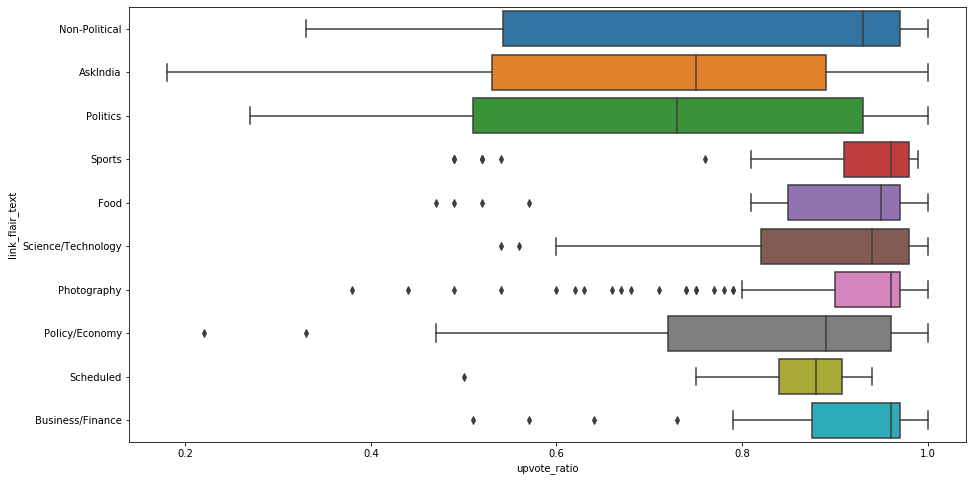

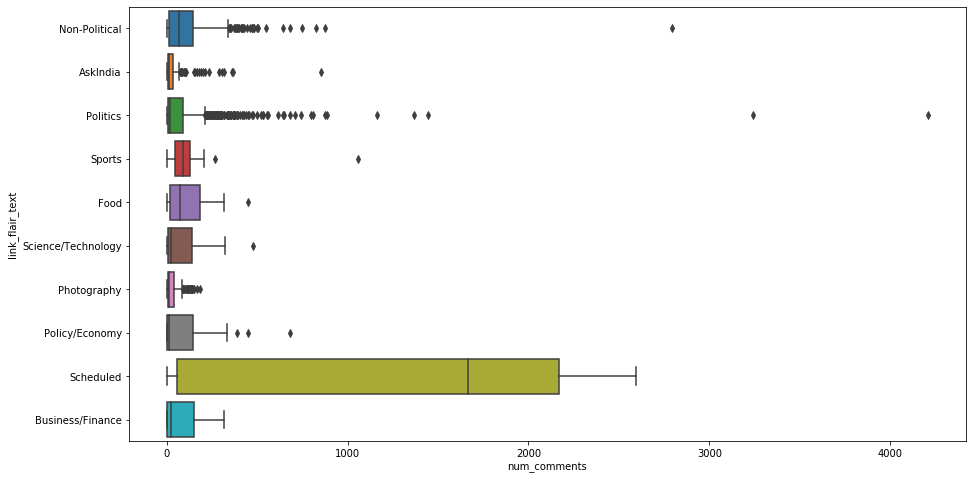

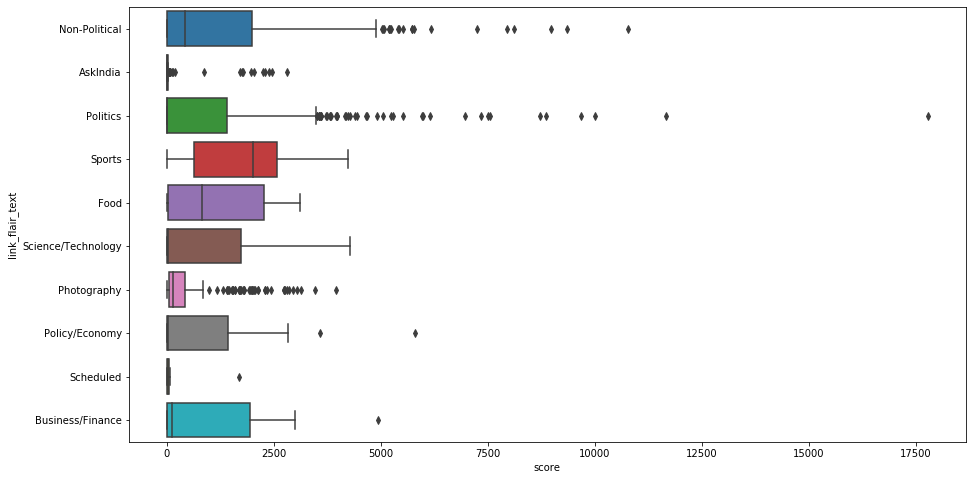

In [13]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,8))
sns.boxplot(x=numeric_features.upvote_ratio,y=target_feature.link_flair_text)
#sns.swarmplot(x=numeric_features.upvote_ratio,y=target_feature.link_flair_text, color=".25")
plt.show()

plt.figure(figsize=(15,8))
sns.boxplot(x=numeric_features.num_comments,y=target_feature.link_flair_text)
#sns.swarmplot(x=numeric_features.num_comments,y=target_feature.link_flair_text, color=".25")
plt.show()

plt.figure(figsize=(15,8))
sns.boxplot(x=numeric_features.score,y=target_feature.link_flair_text)
#sns.swarmplot(x=numeric_features.score,y=target_feature.link_flair_text, color=".25")
plt.show()

Insights:

    1. The posts in politics have the smallest median upvote ratio as compared to ther flairs.
    2. The posts with 'Scheduled' flair have a large amount of comments due to heavy discussions and debates by users on those posts.
    3. The 'Politics' flaired posts have a lot of outliers in score and number of comments.
    4. The posts with 'photography' tend to have larger upvote ratio but lower number of comments.

In [13]:
# Replacing "moderator" values in distinguished with True boool values
data.distinguished = data.distinguished.map({'moderator': True})
# Replacing NaN values to be False bool values for easier data interpretation
data.distinguished.fillna(False, inplace=True)

In [16]:
# Replacing meaningless float values with True to get a bool column
arr = []
for i in data.edited:
    try:
        float(i)
        arr.append(True)
    except:
        arr.append(False)
data.edited = arr


In [18]:
data

,title,score,id,subreddit,url,num_comments,body,link_flair_text,stickied,upvote_ratio,comments,distinguished,edited,over_18,locked,is_original_content,is_self
0,Arunachal Man Kidnapped By Chinese Army Yet To...,1.0,fw8131,india,https://www.ndtv.com/india-news/arunachal-man-...,0.0,NaN,Non-Political,False,1.00,[],False,False,False,False,False,False
1,Anyone planning to get back to the gym after t...,1.0,fw7qcm,india,https://www.reddit.com/r/india/comments/fw7qcm...,1.0,"So, I've lost a ton of muscle thanks to my eye...",AskIndia,False,1.00,['Stay at home! YouTube has thousands of home ...,False,False,False,False,False,True
2,Has anyone insulted you with Bollywood film na...,0.0,fw6nne,india,https://www.reddit.com/r/india/comments/fw6nne...,0.0,I went to one group on Hello Talk and the pric...,AskIndia,False,0.20,[],False,False,False,False,False,True
3,If this ain't true.,4.0,fw6g3q,india,https://i.redd.it/7ux3vl31d9r41.jpg,1.0,NaN,Politics,False,0.64,['Remove “Indian” and it would still be accura...,False,False,False,False,False,False
4,Feeling inadequate,3.0,fw6505,india,https://www.reddit.com/r/india/comments/fw6505...,1.0,"Being quarantined isn't really tricky for me,I...",AskIndia,False,0.80,"['Yes, stay at home. Put out water for birds a...",False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,Backstage picture shows a man getting ready to...,175.0,b778xi,india,https://i.redd.it/7sed8qg7s6p21.jpg,29.0,NaN,Photography,False,0.96,"['Bari laik undu maga ', 'Why is his one nippl...",False,False,False,False,False,False
2646,"Somnath temple at Prabhas Patan, celebrating 6...",115.0,bnaeu1,india,https://i.redd.it/sgug0dya1kx21.jpg,15.0,NaN,Non-Political,False,0.95,"['Nice', 'The same temple that was looted 17 t...",False,False,False,False,False,False
2647,"[OC] Likir Monastery, Leh. [3024 x 4032] - Nok...",56.0,ck42ku,india,https://i.imgur.com/6o3LPuG.jpg,3.0,NaN,Photography,False,0.93,"['[deleted]', 'Nice', 'Nice picture and good q...",False,False,False,False,False,False
2648,[OC] shot on Redmi note 7 image resolution 128...,54.0,bmfx9h,india,https://i.redd.it/a4qpj639h4x21.jpg,21.0,NaN,Photography,False,0.84,['why does everyone have to brag about the pho...,False,False,False,False,False,False


In [16]:
final = numeric_features.filter(['num_comments', 'score', 'upvote_ratio'], axis=1)
final.head()
final['edited'] = categorical_features['edited']
final['over_18'] = categorical_features['over_18']
final['is_original_content'] = categorical_features['is_original_content']
final['is_self'] = categorical_features['is_self']
final['distinguished'] = categorical_features['distinguished']
final['link_flair_text'] = target_feature['link_flair_text']
final.head()


,num_comments,score,upvote_ratio,edited,over_18,is_original_content,is_self,distinguished,link_flair_text
663,0.0,1.0,1.00,False,False,False,True,False,Non-Political
666,1.0,1.0,1.00,False,False,False,False,False,AskIndia
671,0.0,0.0,0.20,False,False,False,False,False,AskIndia
672,1.0,4.0,0.64,False,False,False,False,False,Politics
676,1.0,3.0,0.80,False,False,False,True,False,AskIndia


In [7]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

In [21]:
data.to_csv('final.csv',index=False)